In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from skimage.feature import hog
from skimage import exposure
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Step 1: Load Skin Disease Image Dataset
def load_skin_disease_dataset(dataset_path):
    X = []  # List to store image data
    y = []  # List to store labels

    # Iterate through each subdirectory (each class of skin disease)
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            # Iterate through each image in the class folder
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                if os.path.isfile(image_path):
                    # Read and resize the image to a fixed size (e.g., 64x64)
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (64, 64))
                    # Convert to grayscale
                    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    # Extract HOG features
                    fd, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16),
                                        cells_per_block=(1, 1), visualize=True)
                    #X.append(fd)  # Use HOG features as input
                    #y.append(class_folder)  # Use folder name as the label
                    X.append(img.flatten())  # Flatten the image data
                    y.append(class_folder)  # Use folder name as the label

    return np.array(X), np.array(y)

# Specify the path to your skin disease image dataset
dataset_path = "/content/drive/MyDrive/train"
X, y = load_skin_disease_dataset(dataset_path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Step 2: Preprocess Data and Label Encoding
# Assuming you have labeled classes as strings, you need to convert them to numeric labels
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle
from skimage.io import imread
from skimage.transform import resize
import skimage

In [7]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
pickle.dump(svm_model,open('./svm.pkl','wb'))
# Step 4: Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Step 5: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Step 6: k-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Step 7: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Step 8: Evaluate the Models
models = [('SVM', rf_pred), ('Naive Bayes', nb_pred), ('Random Forest', svm_pred), ('KNN', knn_pred), ('Decision Tree', dt_pred)]

for model_name, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print()

Model: SVM
Accuracy: 0.90
Confusion Matrix:
[[ 41  46   5   3]
 [  2 789  13   9]
 [  1  23 268   5]
 [  2  27   3 151]]
Classification Report:
                            precision    recall  f1-score   support

Basal Cell Carcinoma (BCC)       0.89      0.43      0.58        95
    Melanocytic Nevi (NV)        0.89      0.97      0.93       813
                 Melanoma        0.93      0.90      0.91       297
     Seborrheic Keratoses        0.90      0.83      0.86       183

                  accuracy                           0.90      1388
                 macro avg       0.90      0.78      0.82      1388
              weighted avg       0.90      0.90      0.89      1388


Model: Naive Bayes
Accuracy: 0.65
Confusion Matrix:
[[ 20  34  28  13]
 [ 61 584 103  65]
 [ 13  62 180  42]
 [ 14  40   6 123]]
Classification Report:
                            precision    recall  f1-score   support

Basal Cell Carcinoma (BCC)       0.19      0.21      0.20        95
    Melanocytic Nev

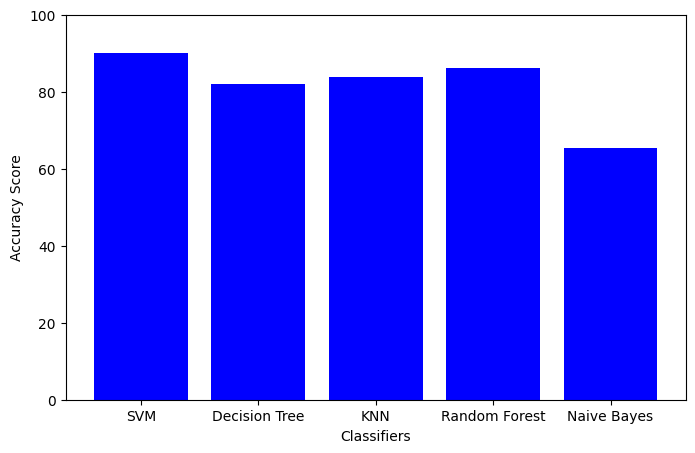

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
# Accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, rf_pred)*100,
                   accuracy_score(y_test, dt_pred)*100,
                   accuracy_score(y_test, knn_pred)*100,
                   accuracy_score(y_test, svm_pred)*100,
                   accuracy_score(y_test, nb_pred)*100]

# Model names
model_names = ['SVM','Decision Tree', 'KNN','Random Forest', 'Naive Bayes']

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color='Blue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.ylim([0, 100])  # Set the y-axis limit to better visualize differences
plt.show()


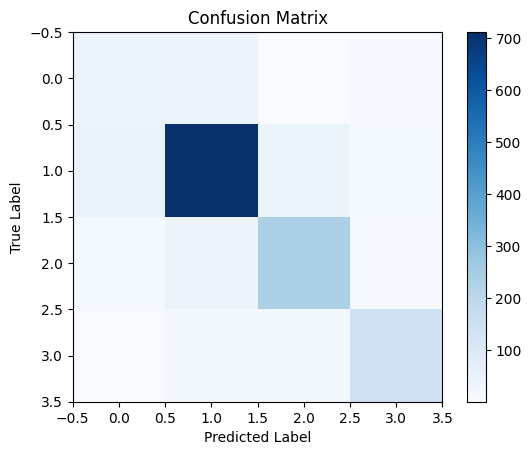

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

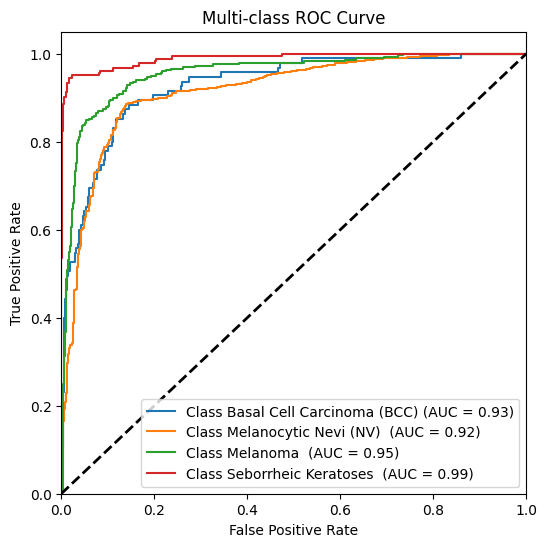

In [ ]:
decision_function_values = svm_model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
# Compute ROC curve and ROC area for each class
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, decision_function_values[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curves for each class
plt.figure(figsize=(6, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model=pickle.load(open('./svm.pkl','rb'))
labels=['basal cell carcinoma', 'melanoma', 'naevus', 'Seborrheic Keratoses']


In [ ]:
images = []
flat_data = []
path=r'/content/drive/MyDrive/predict/'
file=os.listdir('/content/drive/MyDrive/predict')
img = skimage.io.imread(path+str(file[0]))
flat_data.append(img.flatten())
images.append(img)
flat_data = np.array(flat_data)
images = np.array(images)
test_data=Bunch(data=flat_data,images=images)

In [ ]:
ans=svm_model.predict(test_data.data)
print(labels[ans[0]])


In [ ]:
# Function to resize and flatten an image
def preprocess_image(img):
    img_resized = transform.resize(img, (64, 64), mode='constant')
    img_flattened = img_resized.flatten()
    return np.array(img_flattened).reshape(1, -1)

# Load and preprocess the image you want to test
test_image_path = '/content/drive/MyDrive/mdenode_resized/basal cell carcinoma/melanoma2068850_resized.jpg'
test_image = io.imread(test_image_path)
test_image_processed = preprocess_image(test_image)
# Define a mapping between numeric labels and class names
class_mapping = {
    0: 'basal cell carcinoma',
    1: 'melanoma',
    2: 'naevus',
    3: 'Seborrheic Keratoses'
    # Add more mappings as needed
}

# Make a prediction using the SVM model
predicted_label = svm_classifier.predict(test_image_processed)

# Convert the predicted label to the corresponding class name using the mapping
predicted_class_name = class_mapping.get(predicted_label[0], 'Unknown')

# Display the result
print(f'The predicted class for the given image is: {predicted_class_name}')

# Make a prediction using the SVM model
predicted_label = svm_classifier.predict(test_image_processed)

# Display the result
print(f'The predicted label for the given image is: {predicted_label[0]}')


The predicted class for the given image is: Seborrheic Keratoses
The predicted label for the given image is: 3


In [ ]:
import pickle

# Load the SVM model
svm_model_path = './svm.pkl'  # Replace with your actual path
with open(svm_model_path, 'rb') as model_file:
    svm_classifier = pickle.load(model_file)

# Load the LabelEncoder used during training
label_encoder_path = './svm.pkl'  # Replace with your actual path
with open(label_encoder_path, 'rb') as le_file:
    le = pickle.load(le_file)

# Load and preprocess the image you want to test
test_image_path = '/content/drive/MyDrive/mdenode_resized/basal cell carcinoma/melanoma1651872_resized.jpg'
test_image = io.imread(test_image_path)
test_image_processed = preprocess_image(test_image)



# Make a prediction using the SVM model
predicted_label = svm_classifier.predict(test_image_processed)

# Display the result
print(f'The predicted label for the given image is: {predicted_label[0]}')



The predicted label for the given image is: 3


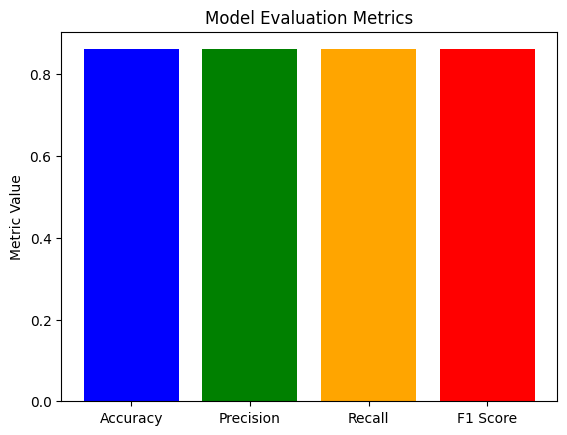

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Calculate metrics
accuracy = metrics.accuracy_score(y_test, svm_pred)
precision = metrics.precision_score(y_test, svm_pred,  average='micro')
recall = metrics.recall_score(y_test, svm_pred, average='micro')
f1 = metrics.f1_score(y_test, svm_pred,  average='micro')

# Plotting
fig, ax = plt.subplots()

# Bar plot for each metric
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]
ax.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])

ax.set_ylabel('Metric Value')
ax.set_title('Model Evaluation Metrics')
plt.show()
